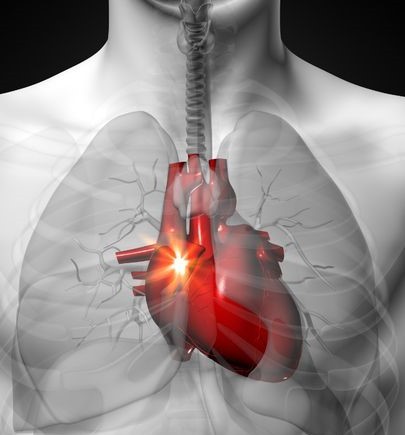

**import libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**Data Collection**

In [4]:

df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Analysis for data and preprocessing**



In [5]:
#number of rows and columns
df.shape

(303, 14)

In [6]:
#getting some info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistics description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#get the count of Target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

C:\Users\future\Documents\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

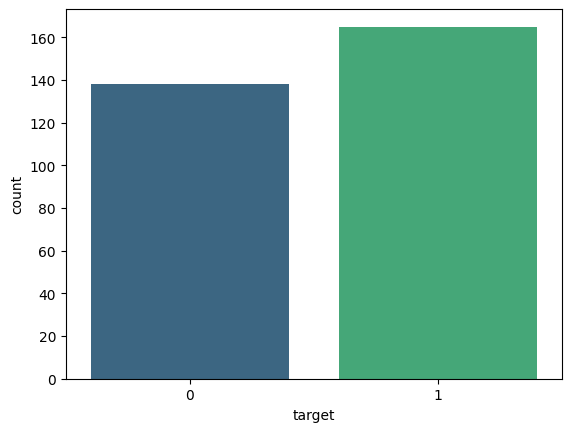

In [10]:
#show the figure for target 
# "0" for non disease and "1" for "disease"
sns.countplot(df['target'],label='count',palette='viridis')


In [11]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


C:\Users\future\Documents\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

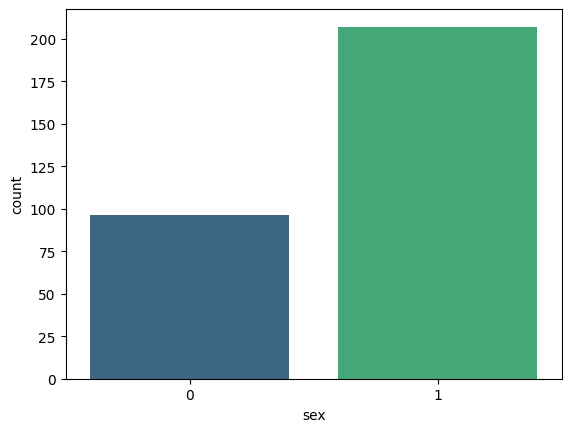

In [12]:
# "0" for females and "1" for males
sns.countplot(df['sex'],label='count',palette='viridis')

In [13]:
Female = len(df[df.sex == 0])
Male = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((Female / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((Male / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


<AxesSubplot:xlabel='sex', ylabel='count'>

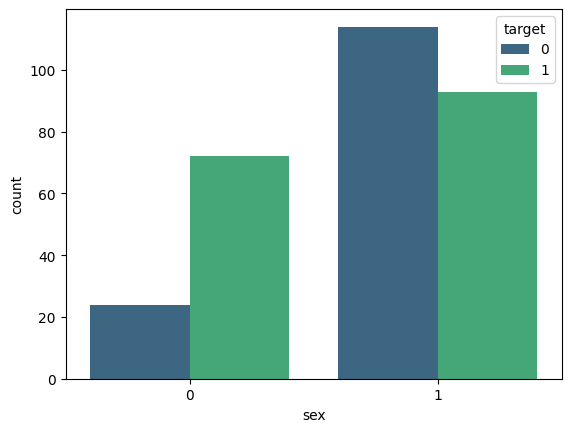

In [14]:
sns.countplot(x='sex', data=df, hue="target", palette='viridis')

In [15]:
#get the coorelation of the columns
df.iloc[:,1:14].corr()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


<AxesSubplot:>

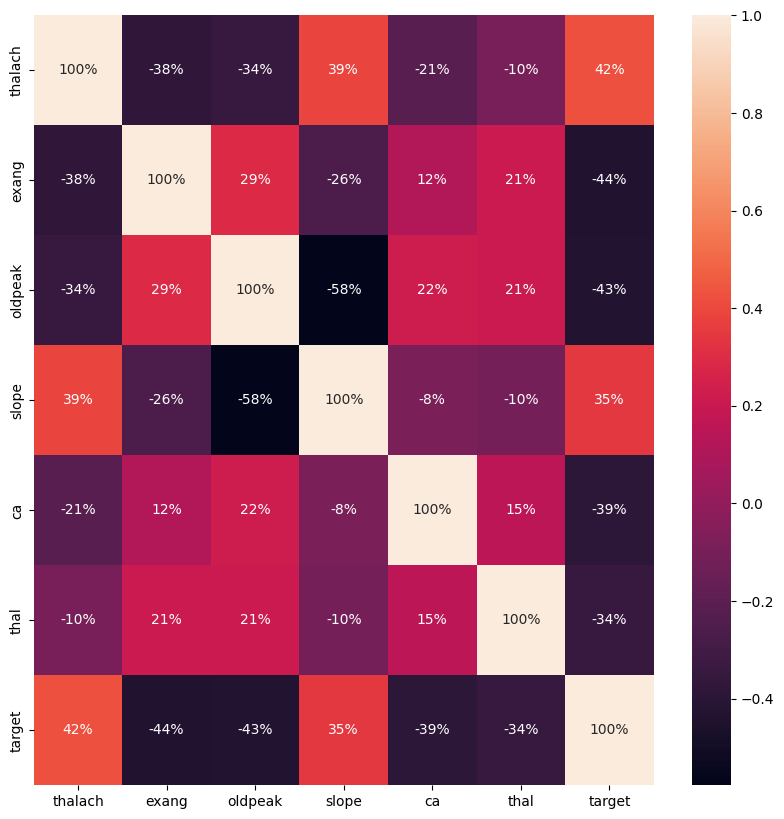

In [16]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,7:14].corr(),annot=True,fmt='.0%')

**Handling Outliers**

<AxesSubplot:>

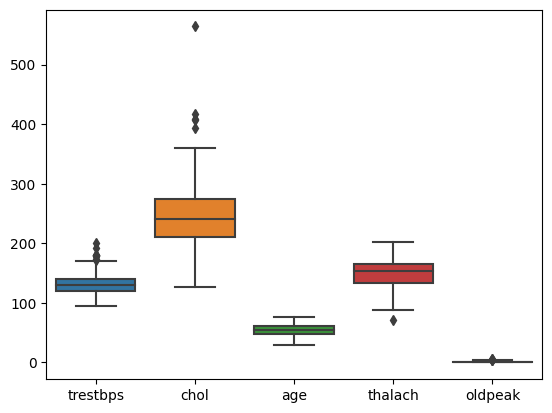

In [17]:
#check outliers
sns.boxplot(data=df[['trestbps','chol','age','thalach','oldpeak']])

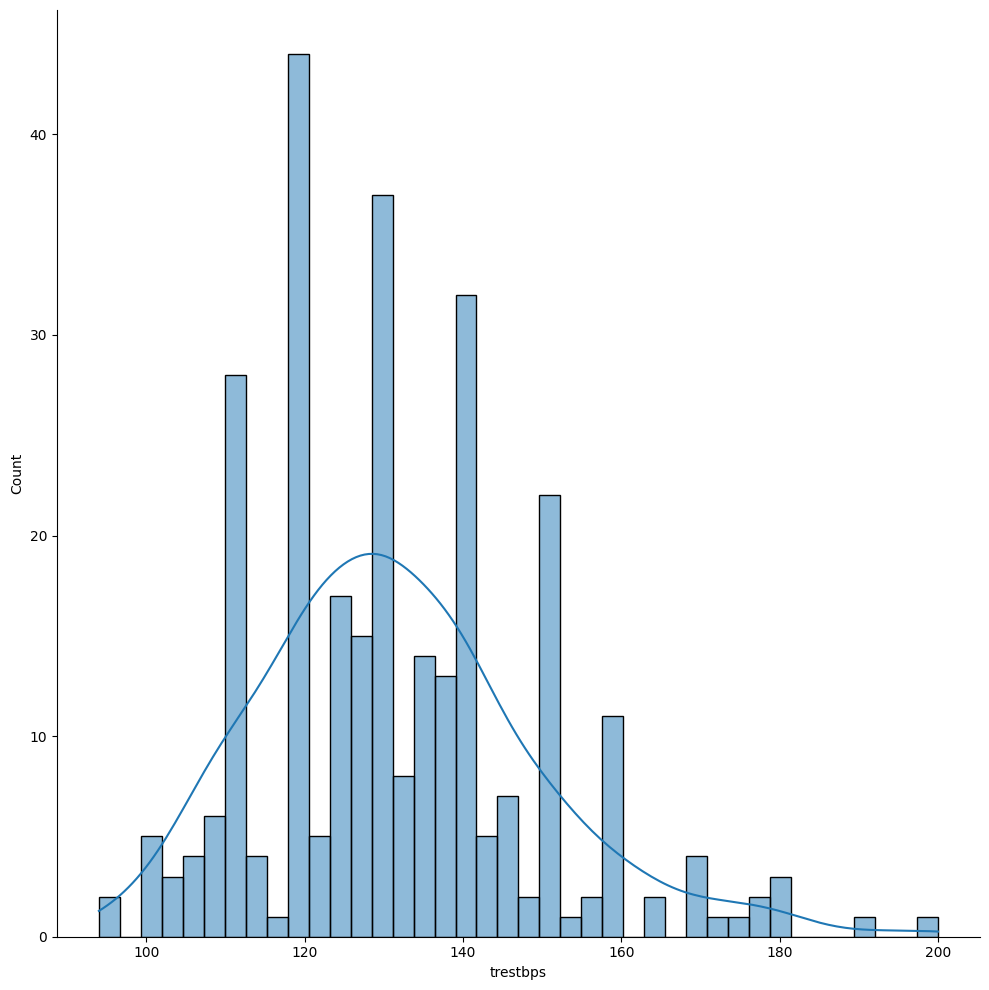

In [18]:
#sekewed
sns.displot(df['trestbps'], kde=True, bins=40,height=10)

In [19]:
#detect outliers
columns = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in age: 0
Number of outliers in sex: 0
Number of outliers in cp: 0
Number of outliers in trestbps: 9
Number of outliers in chol: 5
Number of outliers in fbs: 40
Number of outliers in restecg: 0
Number of outliers in thalach: 1
Number of outliers in exang: 0
Number of outliers in oldpeak: 4
Number of outliers in slope: 0
Number of outliers in ca: 15
Number of outliers in thal: 1
Number of outliers in target: 0


<AxesSubplot:>

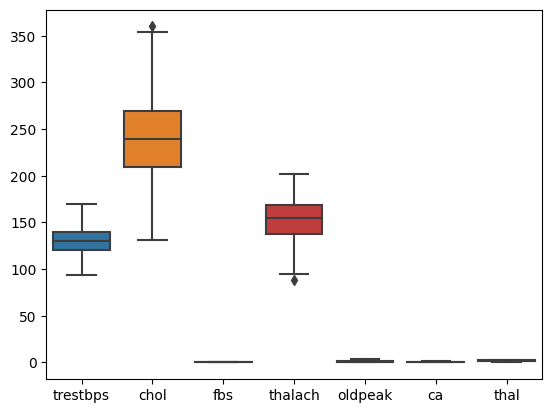

In [20]:
#check outliers
sns.boxplot(data=df[['trestbps','chol','fbs','thalach','oldpeak','ca','thal']])

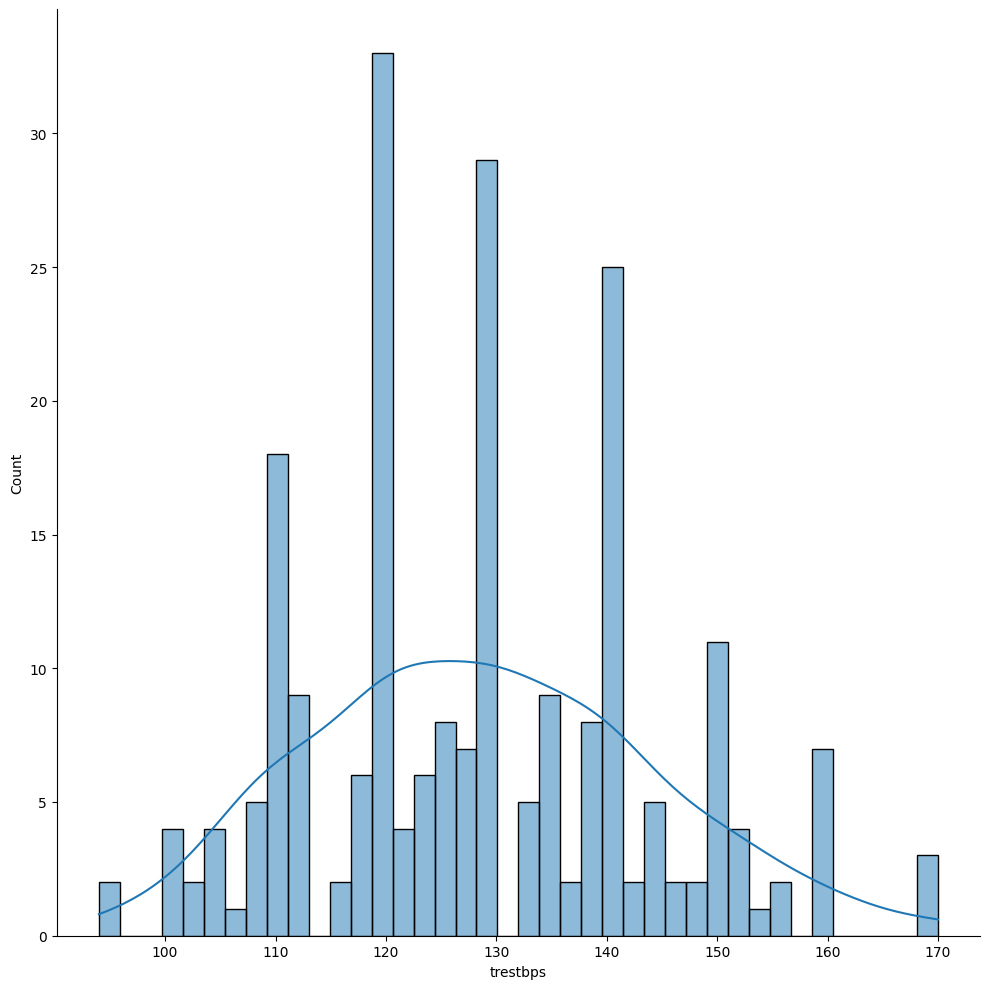

In [21]:
#sekewed 
sns.displot(df['trestbps'], kde=True, bins=40,height=10)

**Splitting features and target**

In [22]:
x=df.drop(columns='target',axis=1)
y=df['target']

**Splitting data into train and test**

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(228, 13) (182, 13) (46, 13)


**Model training**


**Logistic Regression**

In [25]:
Logistic=LogisticRegression(random_state=0)
#training model
Logistic.fit(x_train,y_train)

C:\Users\future\Documents\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

**Model Evaluation & Accuracy**

In [26]:
#accuracy on training data
x_train_pred=Logistic.predict(x_train)
training_accuracy=accuracy_score(x_train_pred,y_train)
print("accuracy of training data is : ",training_accuracy)

accuracy of training data is :  0.8956043956043956


In [27]:
#accuracy on test data
x_test_pred=Logistic.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
print("accuracy of test data is : ",test_accuracy)

accuracy of test data is :  0.8260869565217391


In [28]:
#show classification report
cr=classification_report(y_test,x_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.79      0.96      0.87        27

    accuracy                           0.83        46
   macro avg       0.86      0.80      0.81        46
weighted avg       0.84      0.83      0.82        46



**KNN algorithm**

In [29]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

**Model Evaluation & Accuracy**

In [30]:
#accuracy on training data
x_train_pred=knn.predict(x_train)
training_accuracy=accuracy_score(x_train_pred,y_train)
print("accuracy of training data is : ",training_accuracy)

accuracy of training data is :  0.8076923076923077


In [31]:
#accuracy on test data
x_test_pred=knn.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
print("accuracy of test data is : ",test_accuracy)

accuracy of test data is :  0.6521739130434783


In [32]:
#show classification report
cr=classification_report(y_test,x_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.37      0.47        19
           1       0.66      0.85      0.74        27

    accuracy                           0.65        46
   macro avg       0.65      0.61      0.60        46
weighted avg       0.65      0.65      0.63        46



**Building a predictive system**

In [33]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
#change the input data to a numpy array
na=np.asarray(input_data)
reshaped=na.reshape(1,-1)

prediction=Logistic.predict(reshaped)
print(prediction)
if (prediction[0]==0):
  print("This person doesn't have a heart disease\n")
else:
  print("This person has a heart disease\n")
  

[1]
This person has a heart disease



C:\Users\future\Documents\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
input_data=(67,1,0,160,286,0,0,108,1,1.5,1,3,2)
#change the input data to a numpy array
na=np.asarray(input_data)
reshaped=na.reshape(1,-1)

prediction=knn.predict(reshaped)
print(prediction)
if (prediction[0]==0):
  print("This person doesn't have a heart disease\n")
else:
  print("This person has a heart disease\n")

[0]
This person doesn't have a heart disease



C:\Users\future\Documents\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Save and load Logistic Regression with joblib

In [35]:
import joblib
joblib_file="Heart_Disease_model"
joblib.dump(Logistic,joblib_file)

loaded_model=joblib.load(open(joblib_file,'rb'))
x_test_pred=loaded_model.predict(x_test)
result=np.round(accuracy_score(y_test,x_test_pred),2)
print(result)

0.83
